In [1]:
# Importing Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import shap
# progress bar
from tqdm import tqdm

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# matplotlib defaults
plt.style.use("fivethirtyeight")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

c:\Users\Admin\ML_Projects\Predict_HR_Employee_Joining_Company\Predict-HR-Employee-Joining-Company-Using-ML\myenv\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\Admin\ML_Projects\Predict_HR_Employee_Joining_Company\Predict-HR-Employee-Joining-Company-Using-ML\myenv\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthed

In [2]:
# Load Dataset:
hr_data=pd.read_csv('data.csv')
hr_data.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


# Data Pre-Processing

In [3]:
# Check shape of our data:
hr_data.shape

(8995, 18)

In [4]:
# Check for null values:
hr_data.isnull().sum()

SLNO                           0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [5]:
# Check for Duplicate Records:
hr_data.duplicated().sum()

0

### Since there is no duplicate or null records in our data, we have a cleaned/structured data. Now next step is Descriptive Analysis.

## Descriptive Analysis

In [7]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8995 non-null   int64  
 1   Candidate Ref                8995 non-null   int64  
 2   DOJ Extended                 8995 non-null   object 
 3   Duration to accept offer     8995 non-null   int64  
 4   Notice period                8995 non-null   int64  
 5   Offered band                 8995 non-null   object 
 6   Pecent hike expected in CTC  8995 non-null   float64
 7   Percent hike offered in CTC  8995 non-null   float64
 8   Percent difference CTC       8995 non-null   float64
 9   Joining Bonus                8995 non-null   object 
 10  Candidate relocate actual    8995 non-null   object 
 11  Gender                       8995 non-null   object 
 12  Candidate Source             8995 non-null   object 
 13  Rex in Yrs        

In [8]:
hr_data.describe()

,SLNO,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
count,8995.000000,8.995000e+03,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,5970.984325,2.843647e+06,21.434464,39.291829,43.864804,40.657356,-1.573802,4.239022,29.913174
std,3373.963454,4.863448e+05,25.811616,22.220239,29.788975,36.064060,19.610729,2.547571,4.097912
min,1.000000,2.109586e+06,0.000000,0.000000,-68.830000,-60.530000,-67.270000,0.000000,20.000000
25%,3207.500000,2.386476e+06,3.000000,30.000000,27.270000,22.090000,-8.330000,3.000000,27.000000
50%,5976.000000,2.807482e+06,10.000000,30.000000,40.000000,36.000000,0.000000,4.000000,29.000000
75%,8739.000000,3.300060e+06,33.000000,60.000000,53.850000,50.000000,0.000000,6.000000,34.000000
max,12333.000000,3.836076e+06,224.000000,120.000000,359.770000,471.430000,300.000000,24.000000,60.000000


## Exploratory Data Analysis

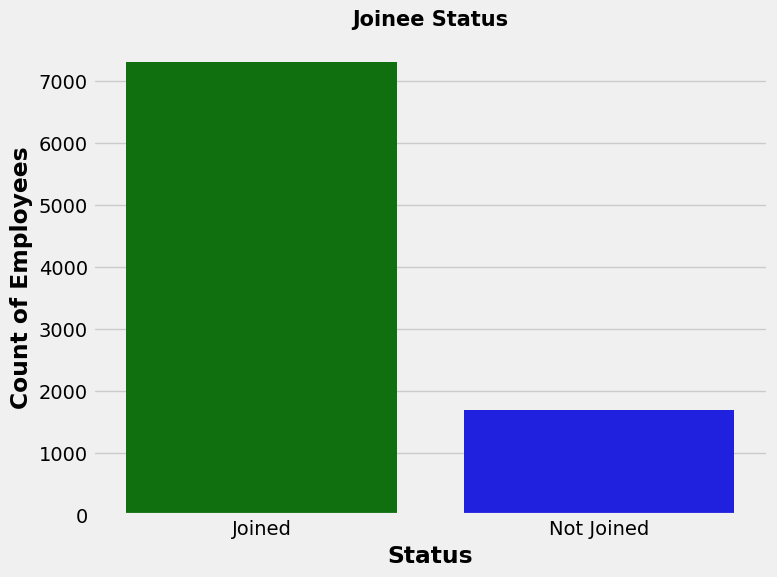

In [16]:
# Plot the bar graph showing count of employees and their status: Joined/Not Joined
def plot_joinee_status(df):
    sts = df['Status'].value_counts()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=sts.index, y=sts.values)
    plt.title('Joinee Status', weight='bold', size=15)
    plt.xlabel("Status", weight='bold')
    plt.ylabel("Count of Employees", weight='bold')
    plt.show()

plot_joinee_status(hr_data)


In [18]:
# divide the num and cat columns

num_col = [col for col in hr_data.columns if hr_data[col].dtypes in ['int64','float64']]
cat_col = [col for col in hr_data.columns if hr_data[col].dtypes == 'object']

dis_col = []
cont_col = []
def separate_num_variables(df,numerical_col):
    #keeping cardinality 10 seperate the discrete and continuos variables

    for col in numerical_col:
        if col == 'Candidate Ref':
            pass
        elif df[col].nunique() < 10:
            dis_col.append(col)
        else:
            cont_col.append(col)
    return dis_col,cont_col          
    
separate_num_variables(hr_data,num_col)

(['Notice period'],
 ['SLNO',
  'Duration to accept offer',
  'Pecent hike expected in CTC',
  'Percent hike offered in CTC',
  'Percent difference CTC',
  'Rex in Yrs',
  'Age'])

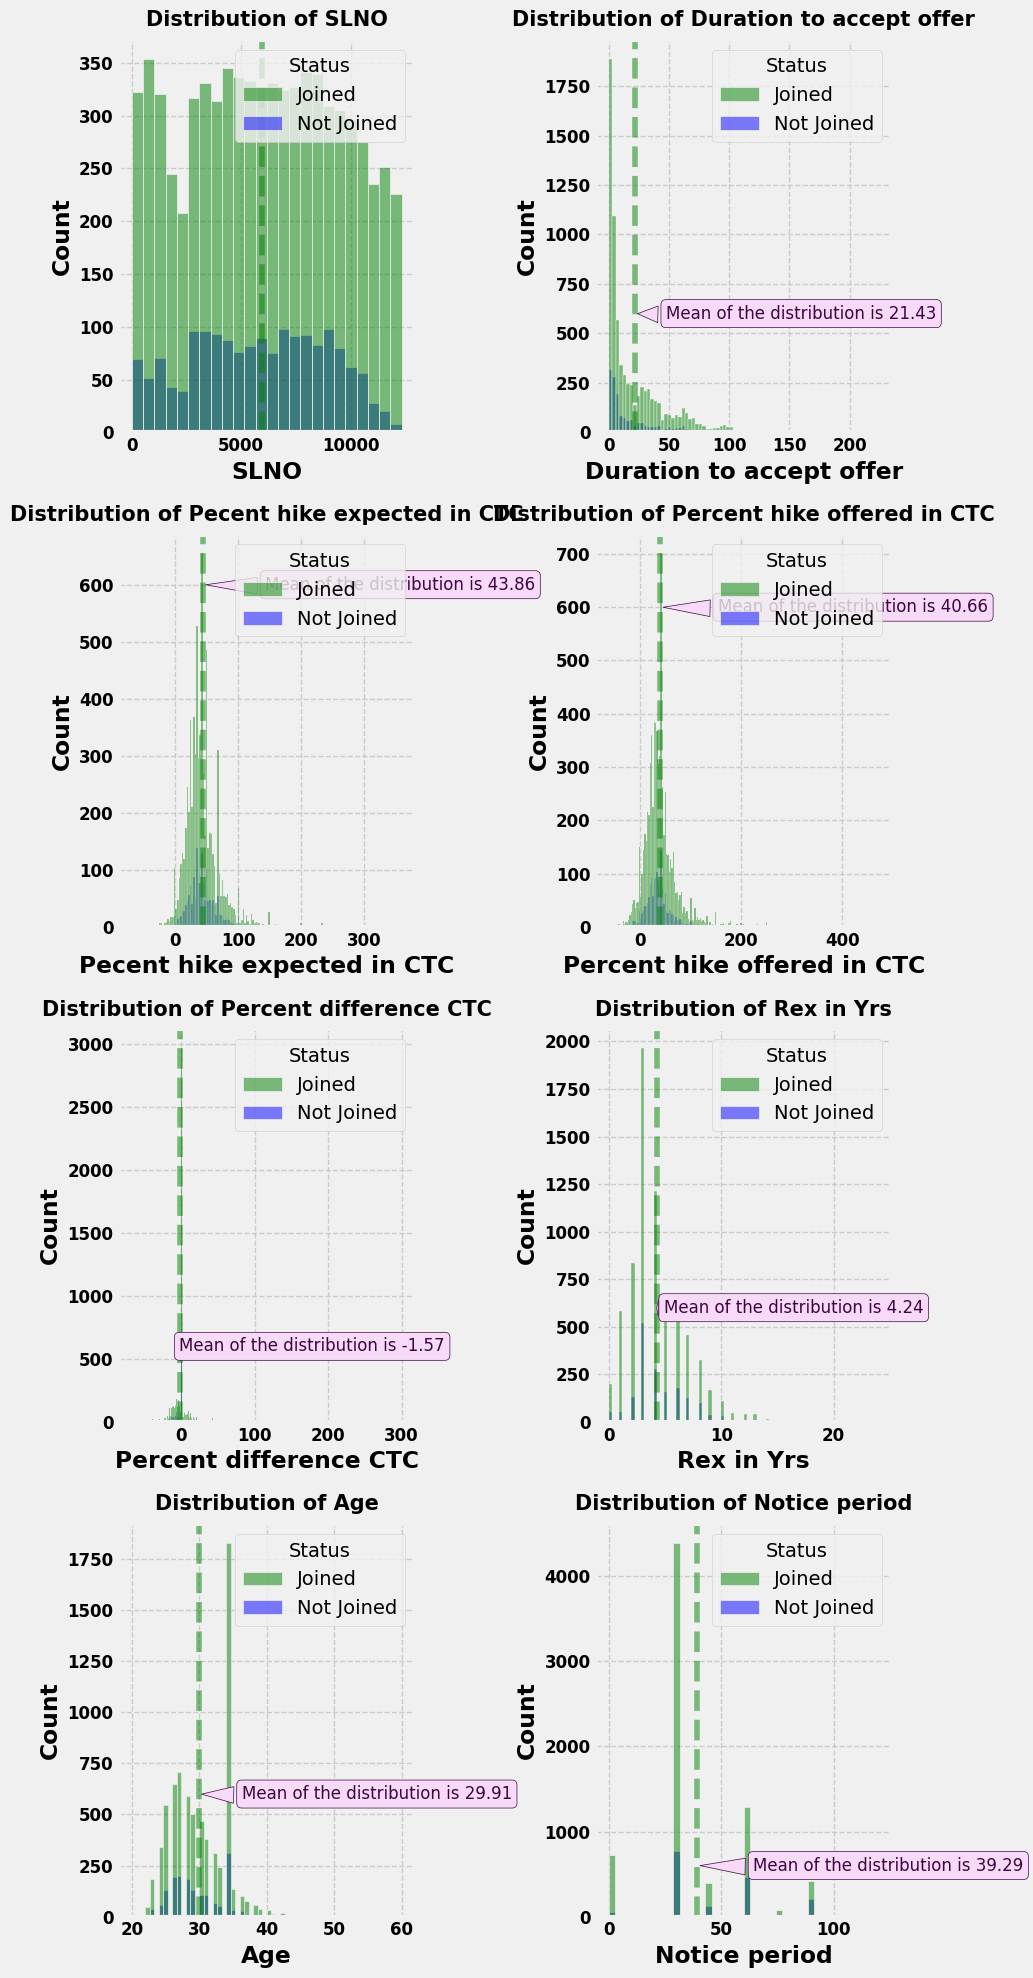

In [20]:
def cont_col_dist(df, cont_columns):
    num_cols = len(cont_columns)
    num_rows = (num_cols + 1) // 2  # Divide the number of columns by 2 and round up to get the number of rows

    plt.figure(figsize=(10, num_rows * 5))  # Adjust the figure size based on the number of rows

    for i, col in enumerate(cont_columns):
        plt.subplot(num_rows, 2, i + 1)  # Use num_rows as the number of rows

        sns.histplot(x=df[col], hue=df['Status'])
        plt.axvline(x=df[col].mean(), linestyle='--', alpha=0.5)
        plt.title(f'Distribution of {col}', weight='bold', size=15)
        plt.xticks(size=12, weight='bold')
        plt.yticks(size=12, weight='bold')
        plt.grid(visible=True, linestyle='--')

        plt.annotate(f'Mean of the distribution is {round(df[col].mean(), 2)}',
                     xy=(df[col].mean(), 600),
                     xycoords='data',
                     xytext=(df[col].mean() + 1, 0),
                     textcoords='offset points',
                     size=12,
                     va="center",
                     color='#3e0542',
                     bbox=dict(boxstyle="round", facecolor='#f7daf7', edgecolor='#3e0542'),
                     arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                     facecolor='#f7daf7',
                                     edgecolor='#3e0542',
                                     relpos=(0.1, 0.4)))

    plt.tight_layout()  # Adjust the spacing between subplots
    plt.show()

cont_col_dist(hr_data, cont_col)


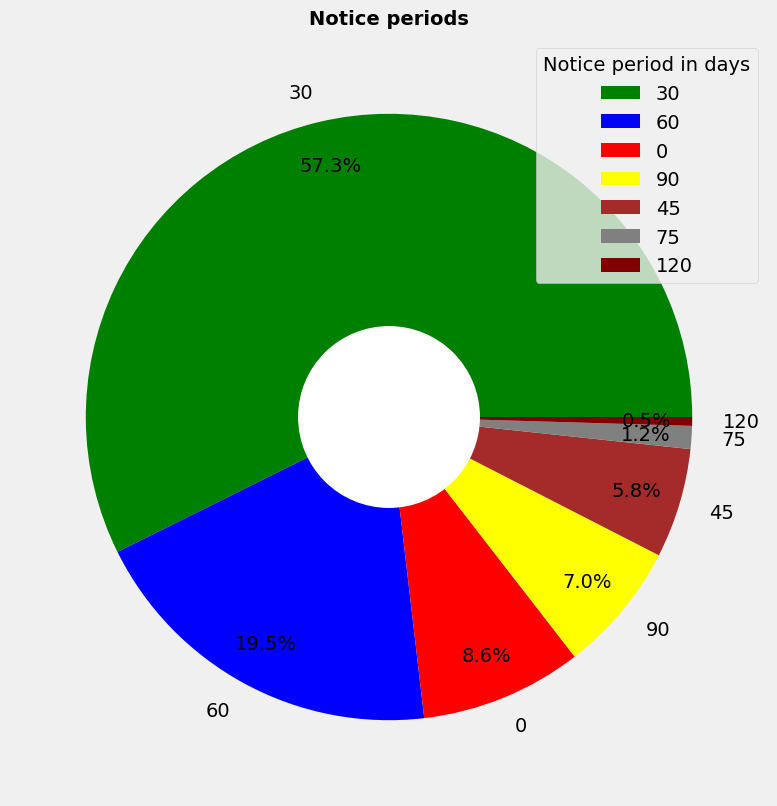

In [30]:
# plot donut chart of Notice period
def plot_notice_period(df):
    donutdf = pd.DataFrame(df['Notice period'].value_counts())
    notice = donutdf.index
    numbers = donutdf.values.ravel()
    explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
    #plot the pie
    fig=plt.figure(figsize=(8,14))
    fig=plt.pie(numbers,  
            labels=notice, 
            autopct='%1.1f%%', 
            pctdistance=0.85, 
            )
    centre_circle = plt.Circle((0,0), 0.3, fc='White')
    fig= plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title("Notice periods")
    plt.legend(title="Notice period in days")
    plt.show()

plot_notice_period(hr_data)

In [32]:
# Create a pivot table which shows notice period 

def pivot_table(df):
    np_df= df.pivot_table(index='Notice period',
                columns='Status',
                values='Candidate Ref',
                aggfunc="count")
    np_df['ratio_by_joining'] = np_df['Joined']/np_df['Not Joined']
    np_df['Joining percent'] = np_df['Joined']/(np_df['Joined']+np_df['Not Joined'])*100
    return np_df

pivot_table(hr_data)

Status,Joined,Not Joined,ratio_by_joining,Joining percent
Notice period,,,,
0,726,51,14.235294,93.436293
30,4393,765,5.742484,85.168670
45,397,129,3.077519,75.475285
60,1285,470,2.734043,73.219373
75,75,35,2.142857,68.181818
90,415,212,1.957547,66.188198
120,22,20,1.100000,52.380952


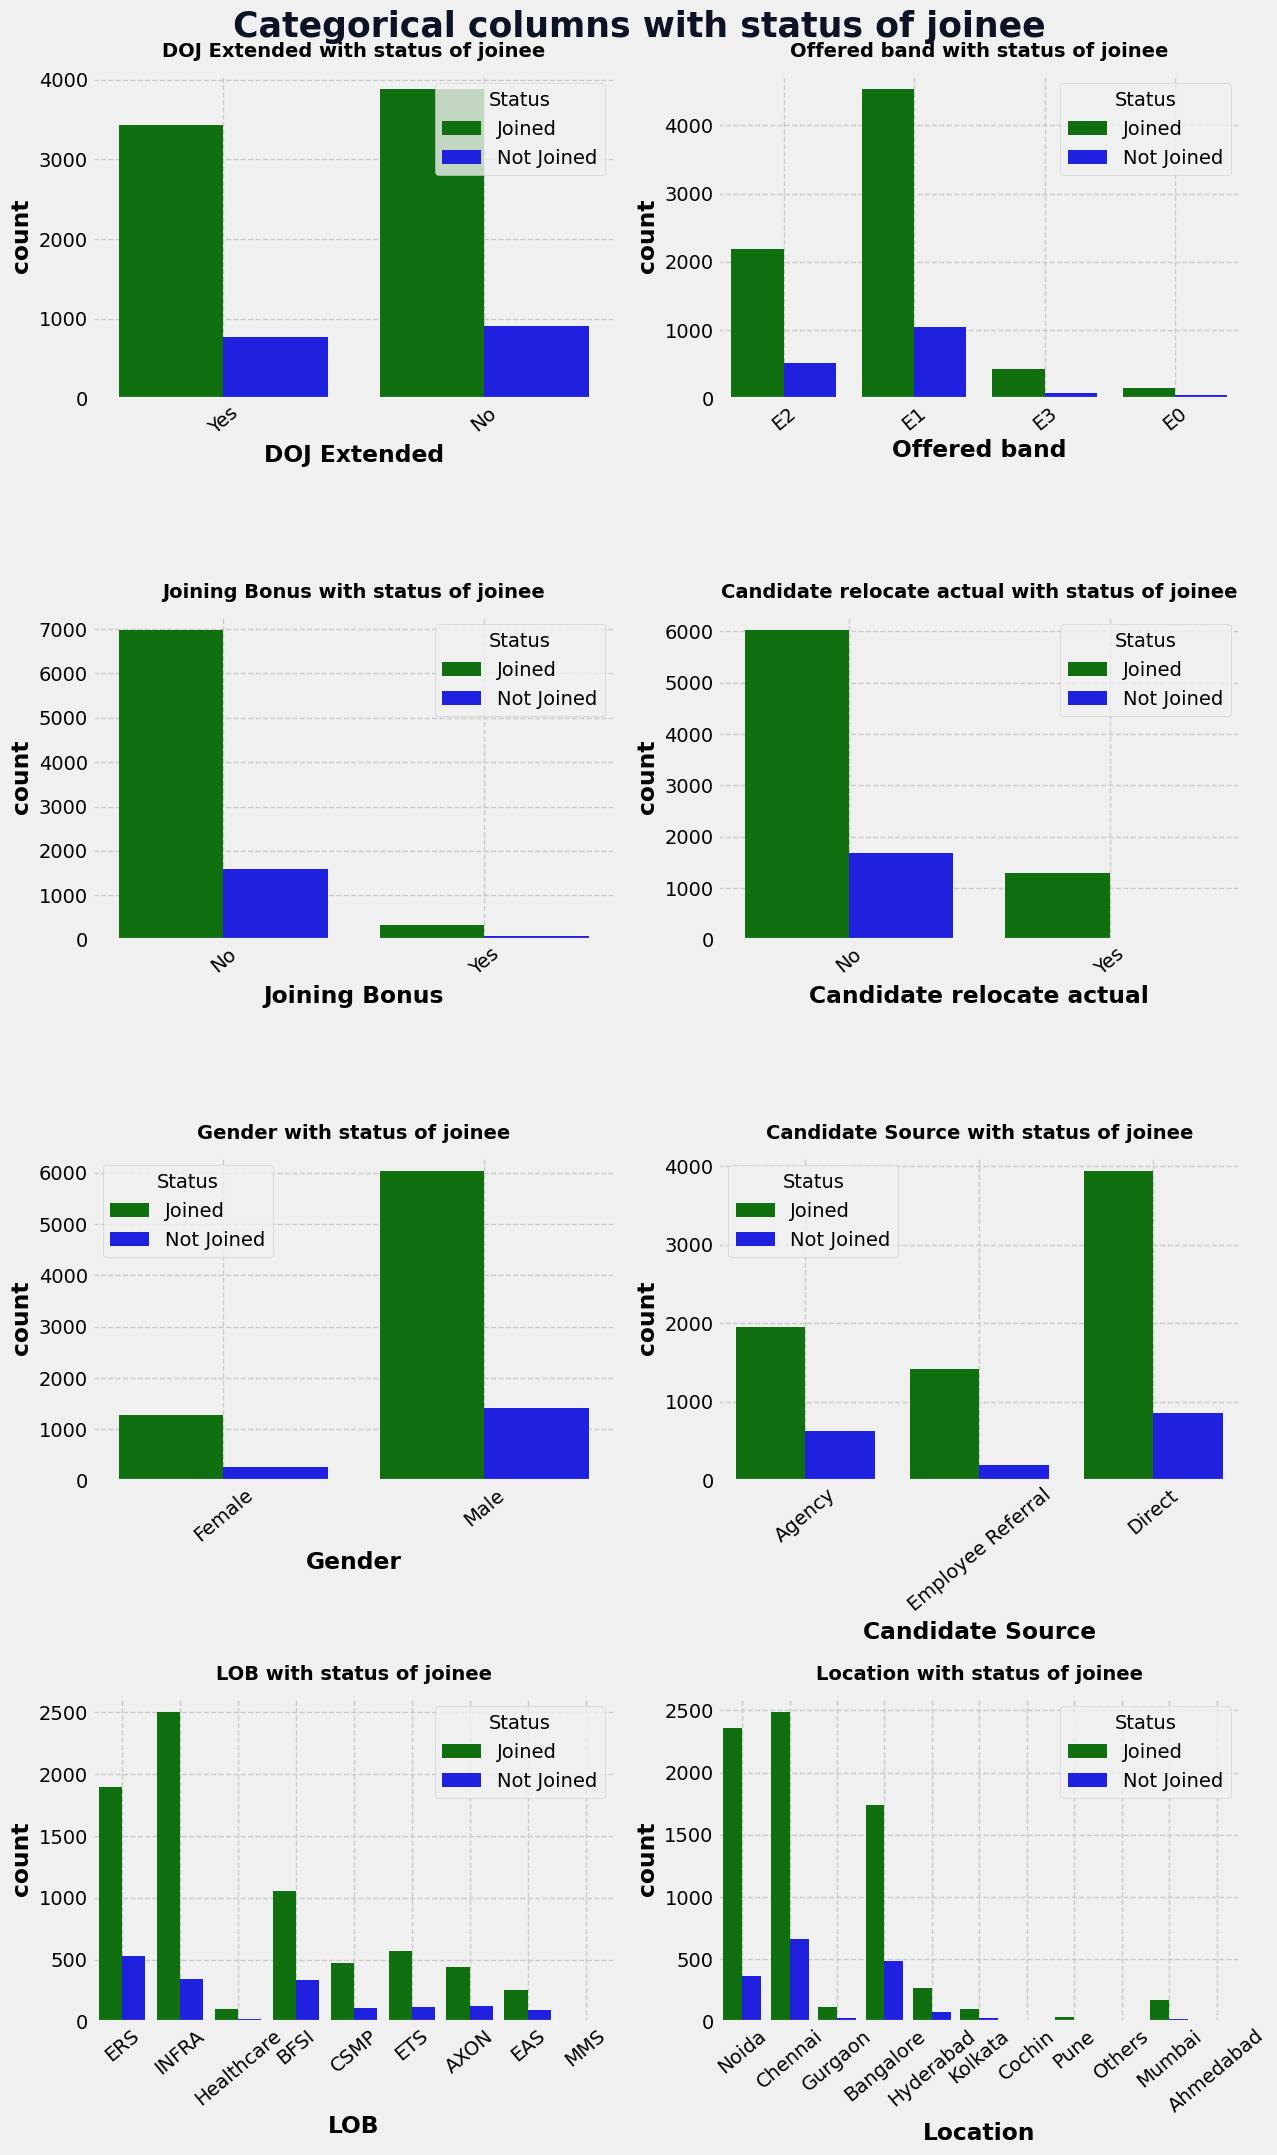

In [33]:
def cat_col_status_joinee(df,col_list):
    fig, ax = plt.subplots(4,2, figsize=(13,22))
    for idx, col in enumerate(col_list):
        sns.countplot(x=col, hue='Status', data=df, ax=ax[idx//2, idx%2])
        ax[idx//2, idx%2].grid(visible=True, linestyle='--')
        ax[idx//2, idx%2].set_xticklabels(list(df[col].unique()), rotation=40)
        ax[idx//2, idx%2].set_title(f'{col} with status of joinee', pad=12)
        
    plt.suptitle(f'Categorical columns with status of joinee', fontsize=25, fontweight='bold',
                color='#0b1324')
    plt.show()

col_list = [col for col in cat_col if col != 'Status']
cat_col_status_joinee(hr_data,col_list)    

In [35]:
# Create a Pivot Table to show number of candidates by line of business and notice period:
nlobdf= pd.DataFrame(hr_data.groupby(['Notice period','LOB'])['Candidate Ref'].count())
nlobdf 

Candidate Ref
Notice period LOB                      
0             AXON                   53
              BFSI                   39
              CSMP                   26
              EAS                    28
              ERS                   173
              ETS                    63
              Healthcare              8
              INFRA                 387
30            AXON                  291
              BFSI                  814
              CSMP                  357
              EAS                   172
              ERS                  1374
              ETS                   343
              Healthcare             69
              INFRA                1731
              MMS                     7
45            AXON                   34
              BFSI                   61
              CSMP                   43
              EAS                    19
              ERS                   202
              ETS                    46
              Healthcare              5
              INFRA                 115
              MMS                     1
60            AXON                  101
              BFSI                  327
              CSMP                  118
              EAS                    83
              ERS                   482
              ETS                   167
              Healthcare             31
              INFRA                 441
              MMS                     5
75            AXON                    6
              BFSI                    6
              CSMP                    5
              EAS                     7
              ERS                    37
              ETS                    11
              Healthcare              1
              INFRA                  37
90            AXON                   75
              BFSI                  147
              CSMP                   29
              EAS                    37
              ERS                   141
              ETS                    59
              Healthcare             10
              INFRA                 127
              MMS                     2
120           AXON                    8
              BFSI                    2
              CSMP                    1
              ERS                    17
              ETS                     2
              INFRA                  12

In [36]:
# Create a Pivot Table which shows relation between location, Percent differnce CTC and joinee status:
def pivot_loc_joinee(df):
    return df.pivot_table(values='Percent difference CTC',
                index='Location',
                columns='Status',
                aggfunc=[np.mean, np.median, np.max, np.min])
pivot_loc_joinee(hr_data)    

mean             median               amax              amin   
Status        Joined Not Joined  Joined Not Joined  Joined Not Joined Joined   
Location                                                                       
Ahmedabad -11.430000 -28.000000   0.000    -28.000   16.67     -28.00 -48.82  \
Bangalore  -1.642899  -3.142889   0.000     -3.280  300.00     144.95 -66.67   
Chennai    -0.868998  -3.825858   0.000     -4.170  272.34     300.00 -60.00   
Cochin    -19.285714   0.000000 -20.000      0.000    0.00       0.00 -40.00   
Gurgaon    -2.627458  -1.876071  -3.665      0.000   68.00      20.29 -41.67   
Hyderabad   0.213083  -1.133200   0.000     -5.000  129.17     152.50 -39.29   
Kolkata    -5.930300  -6.189310  -3.355     -5.000   19.51      10.00 -46.00   
Mumbai     -2.301250  -5.903333   0.000      0.000   46.43       6.14 -61.54   
Noida      -1.101859  -0.884767   0.000      0.000  233.33     175.00 -67.27   
Others     -1.286154        NaN   0.000        NaN   11.11        NaN -14.50   
Pune       -3.793158  -6.106000  -1.090     -3.845   20.00       7.41 -45.00   

                      
Status    Not Joined  
Location              
Ahmedabad     -28.00  
Bangalore     -43.75  
Chennai       -48.57  
Cochin          0.00  
Gurgaon       -12.50  
Hyderabad     -43.75  
Kolkata       -56.36  
Mumbai        -24.62  
Noida         -62.50  
Others           NaN  
Pune          -23.08

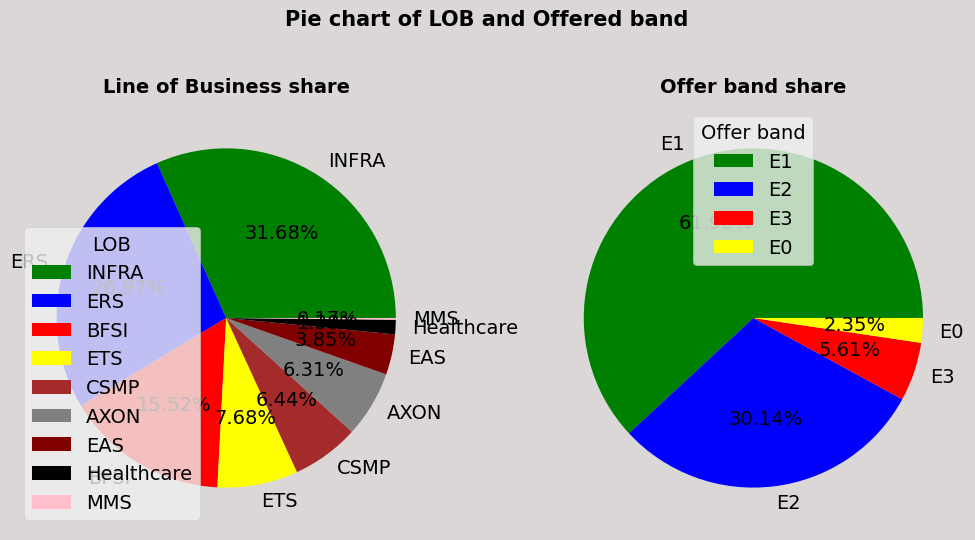

In [37]:

def plot_offered_LOB(df):

    lobdf = df['LOB'].value_counts()
    offerdf = df['Offered band'].value_counts()

    # plot the pie charts
    plt.figure(figsize=(10,6), facecolor='#dbd7d7')

    plt.subplot(1,2,1)
    plt.pie(lobdf.values,  
            labels=lobdf.index,
        autopct='%1.2f%%')
    plt.legend(title='LOB')
    plt.title("Line of Business share")

    plt.subplot(1,2,2)
    plt.pie(offerdf.values,
        labels=offerdf.index,
        autopct='%1.2f%%')
    plt.legend(title='Offer band')
    plt.title("Offer band share")

    plt.suptitle("Pie chart of LOB and Offered band", weight='bold', size=15)
    plt.show()

plot_offered_LOB(hr_data)

In [38]:
rex_offerdf = hr_data.groupby(['Offered band','Rex in Yrs']).Age.mean().reset_index()
rex_offerdf

,Offered band,Rex in Yrs,Age
0,E0,0,23.118812
1,E0,1,30.000000
2,E0,2,30.500000
3,E1,0,27.434783
4,E1,1,27.148936
5,E1,2,28.032941
6,E1,3,28.769092
7,E1,4,29.687554
8,E1,5,30.669136
9,E1,6,31.511111


## Conclusions: 

**We can learn that years of experience, Age directly proportaional to offerband**

**31.68% candidates are from Infra LOB and 61.9% of candidates were offered E1 offer band**

**On an average, candidates are less likely to join the company if offered Hike is lower than the expected.**

**Most Employees prefer Joining Bonus**

**We have most numbers of candidates from Chennai city of India and also more joinees are from Chennai, vice versa.**

**Majority of candidates are sourced directly by the company.**

**Majority of the candidates are Male.**

**Employees prefer E1 Offer Band.**

**Most Employees prefer 30 days notice period**

**As notice period increases chances of employee joining decreases**

**Average percent hike offered is lower than the expected by the candidate.**

**Average age is about 29.9 years with majority numbers of candidates from 30+ years age group.**

**On An avearge candidates take 21 days to accept the offer by the company.**

**Majority of the candidates are having low relevant years of experience in their respective line of business with average of 4.24 years.**